# Notebook to scrape BonAppetit.com recipe text
`super.csv` found in `web_apps` contains an amalgamated csv. `w_urls.csv` found in this directory contains most of what is scraped here. 

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from fake_useragent import UserAgent
import time
import random
from datetime import datetime

In [ ]:
urls = []
for i in range(start,stop+1):
    ua = UserAgent()
    user_agent = {'User-agent': ua.random}
    if i == 1:
        page_num = ""
    else:
        page_num = f"page/{i}"
    url = f'https://www.breitbart.com/2020-election/{page_num}'
    response = requests.get(url, headers = user_agent)
    page = response.text
    soup = BeautifulSoup(page, 'lxml')
    link_lst = soup.find('section', class_='aList')
    values = []
    for a in link_lst.find_all('a', href=True):
        value = a['href']
        if '/author/' not in value:
            if value not in values:
                values.append(value)
    values_df = pd.Series(values)
    urls.append(values_df)
url_df = pd.concat(urls)

In [4]:
ua = UserAgent()
user_agent = {'User-agent': ua.random}

In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from fake_useragent import UserAgent

ua = UserAgent()
user_agent = {'User-agent': ua.random}
print(user_agent)


chromedriver = "/Applications/chromedriver" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver
driver = webdriver.Chrome(chromedriver)

{'User-agent': 'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML like Gecko) Chrome/44.0.2403.155 Safari/537.36'}


In [3]:
driver.get(url = f'https://www.bonappetit.com/search/?content=recipe')
metal_soup = BeautifulSoup(driver.page_source, 'lxml')

In [28]:
recipes = metal_soup.find_all('article', class_= 'recipe-content-card')

In [145]:
import urllib, io
from StringIO import StringIO

ModuleNotFoundError: No module named 'StringIO'

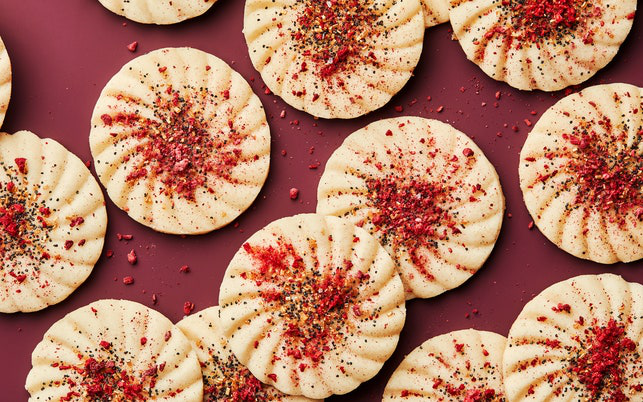

In [157]:
urllib.request.urlretrieve("https://assets.bonappetit.com/photos/5fb7e3af5d6dedbf765ba750/8:5/w_644,h_402,c_limit/1220-Cookies-nan-e-berenji.jpg", "sample.png")
Image.open('sample.png')

In [167]:
ims = []
for r in recipes:
    img = r.find('picture')
    #print(img)
    try:
        for a in img.find_all('source'):
            link = (a['srcset'].split()[1])
            if link is not None:
                urllib.request.urlretrieve(link, 'im.png')
                im = Image.open('im.png')
                ims.append(im)
            else: 
                continue
    except:
        continue

In [178]:
values = {}
for a in recipes:
    souped = a.find('a', href=True)
    desc = a.find('p')
    img = a.find('picture')    
    # print(souped.text)
    # print(souped['href'])
    # print(desc.text)
    values[souped.text] = [souped['href'], desc.text]
values

{'Nan-e Berenji': ['/recipe/nan-e-berenji',
  '“Nan-e berenji, a Persian rice flour cookie, is delicate and light,” says Andy Baraghani. His version cuts the sugar by a third and tops the cookies with poppy seeds, black sesame, finely ground pistachios, and freeze-dried raspberries for color. Traditionally eaten alongside bitter bergamot tea, this version is slightly less sweet so that it can stand on its own.'],
 'Corn and Crab Beignets With Yaji Aioli': ['/recipe/corn-and-crab-beignets-with-yaji-aioli',
  'This ode to chef BJ Dennis and Gullah Geechee cuisine marries crabmeat with corn kernels for a crispy party starter. The aioli, spiked with the West African spice blend yaji, is ideal for dipping. It’s a flavor-packed condiment ideal for everything from seafood dishes (like these beignets) or grilled vegetables to just a warm baguette.\nThis recipe was adapted from ‘The Rise: Black Cooks and the Soul of American Food,’ by Marcus Samuelsson with Yewande Komolafe and Tamie Cook.'],
 

In [40]:
values

{'Nan-e Berenji': ['/recipe/nan-e-berenji',
  '“Nan-e berenji, a Persian rice flour cookie, is delicate and light,” says Andy Baraghani. His version cuts the sugar by a third and tops the cookies with poppy seeds, black sesame, finely ground pistachios, and freeze-dried raspberries for color. Traditionally eaten alongside bitter bergamot tea, this version is slightly less sweet so that it can stand on its own.'],
 'Corn and Crab Beignets With Yaji Aioli': ['/recipe/corn-and-crab-beignets-with-yaji-aioli',
  'This ode to chef BJ Dennis and Gullah Geechee cuisine marries crabmeat with corn kernels for a crispy party starter. The aioli, spiked with the West African spice blend yaji, is ideal for dipping. It’s a flavor-packed condiment ideal for everything from seafood dishes (like these beignets) or grilled vegetables to just a warm baguette.\nThis recipe was adapted from ‘The Rise: Black Cooks and the Soul of American Food,’ by Marcus Samuelsson with Yewande Komolafe and Tamie Cook.'],
 

In [90]:
# chromedriver = "/Applications/chromedriver" # path to the chromedriver executable
# os.environ["webdriver.chrome.driver"] = chromedriver
# driver = webdriver.Chrome(chromedriver)
def get_links(start,stop):
    urls = []
    values = {}
    for i in range(start,stop+1):
        ua = UserAgent()
        user_agent = {'User-agent': ua.random}
        time.sleep(1+.2*random.randint(1,10))
        if i == 1:
            page_num = ""
        else:
            page_num = f"&page={i}"
        driver.get(url = f'https://www.bonappetit.com/search/?content=recipe{page_num}')
        metal_soup = BeautifulSoup(driver.page_source, 'lxml')
        recipes = metal_soup.find_all('article', class_= 'recipe-content-card')
        try:
            for a in recipes:
                try:
                    souped = a.find('a', href=True)
                    desc = a.find('p')
                    print(page_num)
                    values[souped.text] = [souped['href'], desc.text, page_num]
                except:
                    continue
        except:
            continue
    return pd.DataFrame(values).T

In [91]:
df = get_links(1,50)



















&page=2
&page=2
&page=2
&page=2
&page=2
&page=2
&page=2
&page=2
&page=2
&page=2
&page=2
&page=2
&page=2
&page=2
&page=2
&page=2
&page=2
&page=2
&page=3
&page=3
&page=3
&page=3
&page=3
&page=3
&page=3
&page=3
&page=3
&page=3
&page=3
&page=3
&page=3
&page=3
&page=3
&page=3
&page=3
&page=3
&page=4
&page=4
&page=4
&page=4
&page=4
&page=4
&page=4
&page=4
&page=4
&page=4
&page=4
&page=4
&page=4
&page=4
&page=4
&page=4
&page=4
&page=4
&page=5
&page=5
&page=5
&page=5
&page=5
&page=5
&page=5
&page=5
&page=5
&page=5
&page=5
&page=5
&page=5
&page=5
&page=5
&page=5
&page=5
&page=5
&page=6
&page=6
&page=6
&page=6
&page=6
&page=6
&page=6
&page=6
&page=6
&page=6
&page=6
&page=6
&page=6
&page=6
&page=6
&page=6
&page=6
&page=6
&page=7
&page=7
&page=7
&page=7
&page=7
&page=7
&page=7
&page=7
&page=7
&page=7
&page=7
&page=7
&page=7
&page=7
&page=7
&page=7
&page=7
&page=7
&page=8
&page=8
&page=8
&page=8
&page=8
&page=8
&page=8
&page=8
&page=8
&page=8
&page=8
&page=8
&page=8
&page=8
&page=

In [83]:
df = df.T

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 898 entries, Nan-e Berenji to Coconut-Ginger Chickpea Soup
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       898 non-null    object
 1   1       898 non-null    object
 2   2       898 non-null    object
dtypes: object(3)
memory usage: 68.1+ KB


In [179]:
df2 = get_links(51,150)

&page=51
&page=51
&page=51
&page=51
&page=51
&page=51
&page=51
&page=51
&page=51
&page=51
&page=51
&page=51
&page=51
&page=51
&page=51
&page=51
&page=51
&page=51
&page=52
&page=52
&page=52
&page=52
&page=52
&page=52
&page=52
&page=52
&page=52
&page=52
&page=52
&page=52
&page=52
&page=52
&page=52
&page=52
&page=52
&page=52
&page=53
&page=53
&page=53
&page=53
&page=53
&page=53
&page=53
&page=53
&page=53
&page=53
&page=53
&page=53
&page=53
&page=53
&page=53
&page=53
&page=53
&page=53
&page=54
&page=54
&page=54
&page=54
&page=54
&page=54
&page=54
&page=54
&page=54
&page=54
&page=54
&page=54
&page=54
&page=54
&page=54
&page=54
&page=54
&page=54
&page=55
&page=55
&page=55
&page=55
&page=55
&page=55
&page=55
&page=55
&page=55
&page=55
&page=55
&page=55
&page=55
&page=55
&page=55
&page=55
&page=55
&page=55
&page=56
&page=56
&page=56
&page=56
&page=56
&page=56
&page=56
&page=56
&page=56
&page=56
&page=56
&page=56
&page=56
&page=56
&page=56
&page=56
&page=56
&page=56
&page=57
&page=57
&page=57
&

In [181]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1786 entries, Bigos (Hunter’s Stew) to Ham and Sausage Jambalaya
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1786 non-null   object
 1   1       1786 non-null   object
 2   2       1786 non-null   object
dtypes: object(3)
memory usage: 55.8+ KB


In [183]:
dfx = pd.concat([df, df2])

In [184]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2684 entries, Nan-e Berenji to Ham and Sausage Jambalaya
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2684 non-null   object
 1   1       2684 non-null   object
 2   2       2684 non-null   object
dtypes: object(3)
memory usage: 163.9+ KB


In [201]:
dfx.iloc[200,1]

'“To be honest, fish can be fickle on the grill,” says Brad Leone. “I’m pretty good at it and still I screw it up sometimes.” To improve the odds, cut the fish into four easy-to-handle pieces—flipping each piece individually is a lot less stressful than dealing with the whole big fish. But leave the skin and bones intact: The skin insulates its tender meat during grilling, and the bones help keep the pieces together.'

In [202]:
df3 = get_links(151,251)

&page=151
&page=151
&page=151
&page=151
&page=151
&page=151
&page=151
&page=151
&page=151
&page=151
&page=151
&page=151
&page=151
&page=151
&page=151
&page=151
&page=151
&page=151
&page=152
&page=152
&page=152
&page=152
&page=152
&page=152
&page=152
&page=152
&page=152
&page=152
&page=152
&page=152
&page=152
&page=152
&page=152
&page=152
&page=152
&page=152
&page=153
&page=153
&page=153
&page=153
&page=153
&page=153
&page=153
&page=153
&page=153
&page=153
&page=153
&page=153
&page=153
&page=153
&page=153
&page=153
&page=153
&page=153
&page=154
&page=154
&page=154
&page=154
&page=154
&page=154
&page=154
&page=154
&page=154
&page=154
&page=154
&page=154
&page=154
&page=154
&page=154
&page=154
&page=154
&page=154
&page=155
&page=155
&page=155
&page=155
&page=155
&page=155
&page=155
&page=155
&page=155
&page=155
&page=155
&page=155
&page=155
&page=155
&page=155
&page=155
&page=155
&page=155
&page=156
&page=156
&page=156
&page=156
&page=156
&page=156
&page=156
&page=156
&page=156
&page=156


In [203]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1708 entries, Spicy Sausage and White Bean Soup to Spicy Tamarind Skirt Steak
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1708 non-null   object
 1   1       1708 non-null   object
 2   2       1708 non-null   object
dtypes: object(3)
memory usage: 53.4+ KB


In [204]:
df_ = pd.concat([dfx,df3])

In [206]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4392 entries, Nan-e Berenji to Spicy Tamarind Skirt Steak
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       4392 non-null   object
 1   1       4392 non-null   object
 2   2       4392 non-null   object
dtypes: object(3)
memory usage: 297.2+ KB


In [207]:
df4 = get_links(252,301)

&page=252
&page=252
&page=252
&page=252
&page=252
&page=252
&page=252
&page=252
&page=252
&page=252
&page=252
&page=252
&page=252
&page=252
&page=252
&page=252
&page=252
&page=252
&page=253
&page=253
&page=253
&page=253
&page=253
&page=253
&page=253
&page=253
&page=253
&page=253
&page=253
&page=253
&page=253
&page=253
&page=253
&page=253
&page=253
&page=253
&page=254
&page=254
&page=254
&page=254
&page=254
&page=254
&page=254
&page=254
&page=254
&page=254
&page=254
&page=254
&page=254
&page=254
&page=254
&page=254
&page=254
&page=254
&page=255
&page=255
&page=255
&page=255
&page=255
&page=255
&page=255
&page=255
&page=255
&page=255
&page=255
&page=255
&page=255
&page=255
&page=255
&page=255
&page=255
&page=255
&page=256
&page=256
&page=256
&page=256
&page=256
&page=256
&page=256
&page=256
&page=256
&page=256
&page=256
&page=256
&page=256
&page=256
&page=256
&page=256
&page=256
&page=256
&page=257
&page=257
&page=257
&page=257
&page=257
&page=257
&page=257
&page=257
&page=257
&page=257


In [209]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 695 entries, Pickled Umeboshi Beets to Shrimp Cocktail
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       695 non-null    object
 1   1       695 non-null    object
 2   2       695 non-null    object
dtypes: object(3)
memory usage: 41.7+ KB


In [210]:
dfX = pd.concat([df_, df4])

In [211]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5087 entries, Nan-e Berenji to Shrimp Cocktail
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5087 non-null   object
 1   1       5087 non-null   object
 2   2       5087 non-null   object
dtypes: object(3)
memory usage: 319.0+ KB


In [212]:
dfX.to_csv('ba5k.csv')

In [300]:
dfX = pd.read_csv('ba5k.csv')

In [216]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5087 non-null   object
 1   0           5087 non-null   object
 2   1           5087 non-null   object
 3   2           5069 non-null   object
dtypes: object(4)
memory usage: 159.1+ KB


## Individual Pages

In [218]:
url = 'https://www.bonappetit.com/recipe/flatbread-with-smoked-trout-radishes-and-herbs'
response = requests.get(url, headers = user_agent)
page = response.text
soup = BeautifulSoup(page, 'lxml')

In [219]:
soup

pi(){return function(e){e({emit:pixel})}}_export(_export.S,"Number",{isNaN:function(e){return e!=e}});var updateRefresh=function(e){var t=e.refreshControl;return function(e){var n=e.slotName,r=e.refresh;"number"==typeof r&&r>0?t.delayRefresh(n,r):t.disableRefresh(n)}};function CNSAdsAPI(e,t,n,r){function i(e){var t=e.device,n=void 0===t?"desktop":t,r=e.server,i=void 0===r?"staging":r;return new Promise(function(e,t){i&&n||t(),e()})}function o(){return!0===get(window,"cns.pageContext.adBlock")}var a=updateRefresh({refreshControl:t});function s(e,t){var n=e.frameElement.parentElement.parentElement.id;a({slotName:n,refresh:t})}function c(e){var t=window.cns.pageContext,i=new CompleteDefiner(Object.assign({},t,e),null,getViewportTemplate());n.reset(function(){return i}),r.insert(n)}function u(){resetUserData(),window.googletag.cmd.push(function(){window.googletag.pubads().clear(),window.googletag.destroySlots()}),fastdom.mutate(function(){for(var e=document.querySelectorAll(".cns-ads-stage

In [227]:
ingredients = soup.find('div', class_='sc-ehAMgd hSiVPP recipe__ingredient-list')

In [290]:
ing_d = {}
ing_d[soup.find(class_='split-screen-content-header__hed').text] = [soup.find('time').text, list(ingredients)[1].text,  [item.text for item in ingredients.find_all('div', class_='sc-iCoHVE sc-fujyUd sc-hJFzDP inZljn jALVaM fusNkn')], soup.find_all('img', src = True)[1]['src']]
#list(ingredients)[2].text
#ing_dic[ingredients[0]] = [ingredients[1], ingredients[2]]

In [291]:
ing_d

{'Flatbread with Smoked Trout, Radishes, and Herbs': ['March 22, 2016',
  '8  Servings',
  ['cups plain whole-milk yogurt',
   'Vegetable oil (for grill)',
   'Garlic-Herb Naan or 1 pound store-bought pizza dough, room temperature, halved',
   '5-ounce packages smoked trout, coarsely flaked',
   'radishes, trimmed, thinly sliced on a mandoline',
   'cup coarsely chopped dill',
   'tablespoons sliced chives',
   'Flaky sea salt',
   'Freshly ground black pepper',
   'Lemon wedges (for serving)',
   'Cheesecloth'],
  'https://assets.bonappetit.com/photos/57acc44853e63daf11a4d9d4/16:9/w_2560%2Cc_limit/flatbread-with-smoked-trout-radishes-and-herbs.jpg']}

In [244]:
items = list(ingredients)[2]

In [258]:
ingredients.p

<p class="sc-iCoHVE sc-fujyUd sc-iuInmz inZljn cquCNg ezMTBD">8  Servings</p>

In [267]:
for item in ingredients.find_all('div', class_='sc-iCoHVE sc-fujyUd sc-hJFzDP inZljn jALVaM fusNkn'):
    print(item.text)

cups plain whole-milk yogurt
Vegetable oil (for grill)
Garlic-Herb Naan or 1 pound store-bought pizza dough, room temperature, halved
5-ounce packages smoked trout, coarsely flaked
radishes, trimmed, thinly sliced on a mandoline
cup coarsely chopped dill
tablespoons sliced chives
Flaky sea salt
Freshly ground black pepper
Lemon wedges (for serving)
Cheesecloth


In [265]:
ingredients.find('div', class_='sc-iCoHVE sc-fujyUd sc-gVtpNI inZljn jALVaM eJRkbj')

In [274]:
soup.find_all('img', src = True)[1]['src']

'https://assets.bonappetit.com/photos/57acc44853e63daf11a4d9d4/16:9/w_2560%2Cc_limit/flatbread-with-smoked-trout-radishes-and-herbs.jpg'

In [279]:
soup.find('time').text

'March 22, 2016'

In [283]:
soup.find(class_='split-screen-content-header__hed').text

'Flatbread with Smoked Trout, Radishes, and Herbs'

In [310]:
dfX = dfX.rename(columns = {'Unnamed: 0': 'name', '0':'url', '1':'desc', '2':'pg'})

In [311]:
dfX

,name,url,desc,pg
0,Nan-e Berenji,/recipe/nan-e-berenji,"“Nan-e berenji, a Persian rice flour cookie, i...",NaN
1,Ginger-Citrus Cookies,/recipe/ginger-citrus-cookies,“My grandmother Helga and I used to make a ver...,NaN
2,"Tequila, Beer, and Citrus Cocktail",/recipe/tequila-beer-and-citrus-cocktail,“I want a holiday cocktail that brings me to t...,NaN
3,Corn and Crab Beignets With Yaji Aioli,/recipe/corn-and-crab-beignets-with-yaji-aioli,This ode to chef BJ Dennis and Gullah Geechee ...,NaN
4,Swedish Glögg,/recipe/swedish-glogg,“In Sweden the holiday season revolves around ...,NaN
...,...,...,...,...
5082,Vegetable Stock,/recipe/vegetable-stock,Don't bother peeling the onions; their skins a...,&page=301
5083,Roast Beef Tenderloin with Horseradish Cream,/recipe/roast-beef-tenderloin-with-horseradish...,Beef tenderloin is our choice cut for this roa...,&page=301
5084,Roasted Fresh Ham with Citrus and Rye,/recipe/roasted-fresh-ham-with-citrus-and-rye,What's better than a white Christmas? A white ...,&page=301
5085,Nutmeg and Black Pepper Popovers,/recipe/nutmeg-black-pepper-popovers,This unconventional popovers recipe stars nutm...,&page=301


In [316]:
dfX.to_csv('ba5k.csv')

In [351]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    5087 non-null   object
 1   url     5087 non-null   object
 2   desc    5087 non-null   object
dtypes: object(3)
memory usage: 119.4+ KB


In [364]:
dfX

,name,url,desc
0,Nan-e Berenji,/recipe/nan-e-berenji,"“Nan-e berenji, a Persian rice flour cookie, i..."
1,Ginger-Citrus Cookies,/recipe/ginger-citrus-cookies,“My grandmother Helga and I used to make a ver...
2,"Tequila, Beer, and Citrus Cocktail",/recipe/tequila-beer-and-citrus-cocktail,“I want a holiday cocktail that brings me to t...
3,Corn and Crab Beignets With Yaji Aioli,/recipe/corn-and-crab-beignets-with-yaji-aioli,This ode to chef BJ Dennis and Gullah Geechee ...
4,Swedish Glögg,/recipe/swedish-glogg,“In Sweden the holiday season revolves around ...
...,...,...,...
5082,Vegetable Stock,/recipe/vegetable-stock,Don't bother peeling the onions; their skins a...
5083,Roast Beef Tenderloin with Horseradish Cream,/recipe/roast-beef-tenderloin-with-horseradish...,Beef tenderloin is our choice cut for this roa...
5084,Roasted Fresh Ham with Citrus and Rye,/recipe/roasted-fresh-ham-with-citrus-and-rye,What's better than a white Christmas? A white ...
5085,Nutmeg and Black Pepper Popovers,/recipe/nutmeg-black-pepper-popovers,This unconventional popovers recipe stars nutm...


In [385]:
ing_x = {}
for row in range(len(dfX)):
    url = f'https://bonappetit.com{dfX.url[row]}'
    response = requests.get(url, headers = user_agent)
    page = response.text
    soup = BeautifulSoup(page, 'lxml')


    #for row in dfX:
    name = None
    date = None
    servs = None
    all_ing = None
    img_url = None
    print({row})
    try:
        ingredients = soup.find('div', class_='sc-ehAMgd hSiVPP recipe__ingredient-list')
    except: 
        print(f'FAIL FAIL at {row}')
        continue
    try:
        name = soup.find(class_='split-screen-content-header__hed').text
    except:
        print(f'fail NAME row {row}')
        continue
    try:
        date = soup.find('time').text
    except:
        print(f'fail DATE row {row}')
        pass
    try:
        servs = list(ingredients)[1].text
    except:
        print(f'fail SERVS row {row}')
        pass
    try:
        all_ing = [item.text for item in ingredients.find_all('div', class_='sc-iCoHVE sc-fujyUd sc-hJFzDP inZljn jALVaM fusNkn')]
    except:
        print(f'fail ALL_ING row {row}')
        continue
    try:
        img_url = soup.find_all('img', src = True)[1]['src']
    except:
        print(f'fail IMG_URL row {row}')
        continue

    ing_x[name] = [date, servs ,all_ing , img_url]

1}
{2252}
{2253}
{2254}
{2255}
{2256}
{2257}
{2258}
{2259}
{2260}
{2261}
{2262}
{2263}
{2264}
{2265}
{2266}
{2267}
{2268}
{2269}
{2270}
{2271}
{2272}
{2273}
{2274}
{2275}
{2276}
{2277}
{2278}
{2279}
{2280}
{2281}
{2282}
{2283}
{2284}
{2285}
{2286}
{2287}
{2288}
{2289}
{2290}
{2291}
{2292}
{2293}
{2294}
{2295}
{2296}
{2297}
{2298}
{2299}
{2300}
{2301}
{2302}
{2303}
{2304}
{2305}
{2306}
{2307}
{2308}
{2309}
{2310}
{2311}
{2312}
{2313}
{2314}
{2315}
{2316}
{2317}
{2318}
{2319}
{2320}
{2321}
{2322}
{2323}
{2324}
{2325}
{2326}
{2327}
{2328}
{2329}
{2330}
{2331}
{2332}
{2333}
{2334}
{2335}
{2336}
{2337}
{2338}
{2339}
{2340}
{2341}
{2342}
{2343}
{2344}
{2345}
{2346}
{2347}
{2348}
{2349}
{2350}
{2351}
{2352}
{2353}
{2354}
{2355}
{2356}
{2357}
{2358}
{2359}
{2360}
{2361}
{2362}
{2363}
{2364}
{2365}
{2366}
{2367}
{2368}
{2369}
{2370}
{2371}
{2372}
{2373}
{2374}
{2375}
{2376}
{2377}
{2378}
{2379}
{2380}
{2381}
{2382}
{2383}
{2384}
{2385}
{2386}
{2387}
{2388}
{2389}
{2390}
{2391}
{2392}
{2393}
{23

In [386]:
ing_DF = pd.DataFrame(ing_x).T
ing_DF

,0,1,2,3
Nan-e Berenji,"December 1, 2020",Makes about 50,"[tsp. baking powder, tsp. ground cardamom, tsp...",https://assets.bonappetit.com/photos/5fb7e3af5...
Ginger-Citrus Cookies,"December 1, 2020",Makes about 28,"[cups 1""–2""-wide strips lemon, lime, orange, o...",https://assets.bonappetit.com/photos/5fb7e3ae5...
"Tequila, Beer, and Citrus Cocktail","December 1, 2020",Makes 1,"[oz. fresh grapefruit juice, oz. fresh lime ju...",https://assets.bonappetit.com/photos/5fb7e3b35...
Corn and Crab Beignets With Yaji Aioli,"December 1, 2020",8 - 10 Servings,"[cup unsalted dry-roasted peanuts, Tbsp. groun...",https://assets.bonappetit.com/photos/5fbc26d57...
Swedish Glögg,"December 1, 2020",Makes about 1½ quarts,"[cinnamon sticks, broken into pieces, tsp. car...",https://assets.bonappetit.com/photos/5fbd604d2...
...,...,...,...,...
Vegetable Stock,"December 10, 2012",2 quarts,"[tablespoon olive oil, medium onions, unpeeled...",https://assets.bonappetit.com/photos/57ae399f5...
Roast Beef Tenderloin with Horseradish Cream,"November 13, 2012",8 to 10 Servings,[cup plus 2 tablespoons crème fraîche or sour ...,https://assets.bonappetit.com/photos/57ae3cda5...
Roasted Fresh Ham with Citrus and Rye,"November 13, 2012",14 Servings,"[12-pound fresh ham, cut from the shank end, c...",https://assets.bonappetit.com/photos/57ae3cfff...
Nutmeg and Black Pepper Popovers,"November 13, 2012",Makes 12 Servings,"[cups all-purpose flour, tablespoons finely ch...",https://assets.bonappetit.com/photos/57ae3c8bf...


In [375]:
ing_DF = pd.DataFrame(ing_x).T

In [376]:
ing_x

, room temperature, halved',
   '5-ounce packages smoked trout, coarsely flaked',
   'radishes, trimmed, thinly sliced on a mandoline',
   'cup coarsely chopped dill',
   'tablespoons sliced chives',
   'Flaky sea salt',
   'Freshly ground black pepper',
   'Lemon wedges (for serving)',
   'Cheesecloth'],
  'https://assets.bonappetit.com/photos/5b5f17f0a6316e2d69db40f2/16:9/w_2560%2Cc_limit/healthyish-fmc-tomatotoastwide.jpg'],
 'Charred and Raw Corn Salad': ['August 1, 2018',
  '8  Servings',
  ['cups plain whole-milk yogurt',
   'Vegetable oil (for grill)',
   'Garlic-Herb Naan or 1 pound store-bought pizza dough, room temperature, halved',
   '5-ounce packages smoked trout, coarsely flaked',
   'radishes, trimmed, thinly sliced on a mandoline',
   'cup coarsely chopped dill',
   'tablespoons sliced chives',
   'Flaky sea salt',
   'Freshly ground black pepper',
   'Lemon wedges (for serving)',
   'Cheesecloth'],
  'https://assets.bonappetit.com/photos/5b5f4ef2f4e38d386b88f0ad/16:9/w

In [387]:
ing_DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4989 entries, Nan-e Berenji to Shrimp Cocktail
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       4989 non-null   object
 1   1       4989 non-null   object
 2   2       4989 non-null   object
 3   3       4989 non-null   object
dtypes: object(4)
memory usage: 194.9+ KB


In [395]:
ing_df.to_csv('ingred.csv')

In [388]:
ing_df =ing_DF.reset_index()
ing_df = ing_df.rename(columns = {'index': 'name', 0:'date', 1:'servs', 2:'ings', 3:'img_url'})

In [403]:
ing_df['num_ing'] = ing_df.ings.apply(lambda x: len(x))

In [411]:
ing_df[ing_df.num_ing >= 30]

,name,date,servs,ings,img_url,num_ing
939,Chopped Salad,"August 14, 2018",4 servings,"[small kabocha or acorn squash (2–3 lb.), Tbsp...",https://assets.bonappetit.com/photos/5b6c7708e...,30
1447,Classic Cassoulet,"September 21, 2017",12 servings,"[duck legs, Tbsp. Diamond Crystal or 3 Tbsp. p...",https://assets.bonappetit.com/photos/5a7dd5ce8...,33
1635,Chilled Ramen with Soy Milk and Chili Oil,"June 20, 2017",4 servings,"[1-inch piece ginger, peeled, very finely chop...",https://assets.bonappetit.com/photos/594427707...,34
1741,Katsu Curry,"April 24, 2017",4 servings,"[quarts low-sodium beef stock or broth, ounces...",https://assets.bonappetit.com/photos/58e284546...,31
2550,Thai Steak and Noodle Salad,"March 22, 2016",4 Servings,"[-inch piece ginger, peeled, finely chopped, c...",https://assets.bonappetit.com/photos/57acc2941...,36
2760,Curried Meatballs,"December 15, 2015",8 Servings,"[Olive oil, scallions, cut into 1-inch pieces,...",https://assets.bonappetit.com/photos/57acd190f...,30
3002,Fall Mole,"August 18, 2015",Makes about 4 cups,"[cup pecans, cup walnuts, cup cashews, cup haz...",https://assets.bonappetit.com/photos/57acdf321...,33
3299,Chile-Cumin Lamb Meatballs with Yogurt and Cuc...,"March 24, 2015",4 Servings,"[pasilla chiles, seeds removed, chopped, teasp...",https://assets.bonappetit.com/photos/57acf2c7f...,30
3354,Momofuku Milk Bar’s Birthday Layer Cake,"March 3, 2015","Makes one 6"" layer cake Servings","[Nonstick vegetable oil spray, cups cake flour...",https://assets.bonappetit.com/photos/57acf4a41...,33
3694,Glazed Duck Confit with Olive Relish and Sauce...,"September 23, 2014",8 Servings,"[cup pitted prunes, wide strips lemon zest, cu...",https://assets.bonappetit.com/photos/57ad30531...,34


In [413]:
ing_df.iloc[150]

name                                            Enfrijoladas
date                                         August 18, 2020
servs                                             4 Servings
ings       [Tbsp. vegetable oil, divided, corn tortillas,...
img_url    https://assets.bonappetit.com/photos/5f32bc326...
num_ing                                                   10
Name: 150, dtype: object